In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from pinkrigs_tools.dataset.query import load_data
from utils import format_session
from classes_v2 import session_data

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=plt.get_cmap("tab10").colors)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load formatted data

In [2]:
# runs only when pandas==1.3.5 - run !pip install pandas==1.3.5
# recordings = load_data(subject = 'AV043',
# 					   expDate = '2024-03-14:2024-03-20', # 2024-03-14 or 2024-03-20 
# 					   expDef = 'multiSpaceWorld_checker_training',
# 					   data_name_dict= 'all-default')

recordings = load_data(subject = 'GB012',
					   expDate = '2024-11-22:2024-12-05', # 2024-03-14 or 2024-03-20 
					   expDef = 'multiSpaceWorld_checker_training',
					   data_name_dict= 'all-default')

formatted_events, formatted_cluster_data, spikes, session_no, session_date, animal_id = format_session(recordings,
                                                                                                       session_no = 1,
                                                                                                       expDef = 'multiSpaceWorld_checker_training')

/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/floras_helpers/hist/regions.py:430: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/floras_helpers/hist/regions.py:432: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))
/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/pinkrigs_tools/utils/spk_utils.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusInfo.brainLocationAcronyms_ccf_2017[


# Creat object

In [3]:
obj = session_data(*format_session(recordings, session_no = 1, expDef = 'multiSpaceWorld_checker_training'),
                   only_validTrails = True, baseline_start = -0.5, stimulus_end = 0.5, 
                   binsize = 0.01, bombcell = True)

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes_v2.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['vis_loc'] = np.select(vis_conditions, vis_choices, default='o')
/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes_v2.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['aud_loc'] = np.select(aud_conditions, aud_choices, default='c')
/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes_v2.py:133: SettingWithCopyWarning: 
A 

# Find Significantly Changed FR

## Methods

### t-test

In [4]:
# obj.select_data_interest()
# # variable[condition_no][choice: all/left/right/no_choice][stats, p_vals, rejected, corrected_p_vals, n_significant, n_significant_mc]
# results_up = obj.find_significant_neurons_grid(method = 'ttest', parametric_test = True, one_sided = True, up_regulated = True, multiple_correction = True, mc_alpha = 0.05, mc_method = 'bonferroni')
# results_down = obj.find_significant_neurons_grid(method = 'ttest', parametric_test = True, one_sided = True, up_regulated = False, multiple_correction = True, mc_alpha = 0.05, mc_method = 'bonferroni')

In [5]:
# obj.visualise_significant_fr_change(method='ttest',
#                                     parametric_test=True,
#                                     one_sided=True,
#                                     multiple_correction=True,
#                                     mc_alpha=0.05,
#                                     mc_method='bonferroni')

In [6]:
# obj.plot_neuron_significant_fr_change()

### CCCP - CCSP

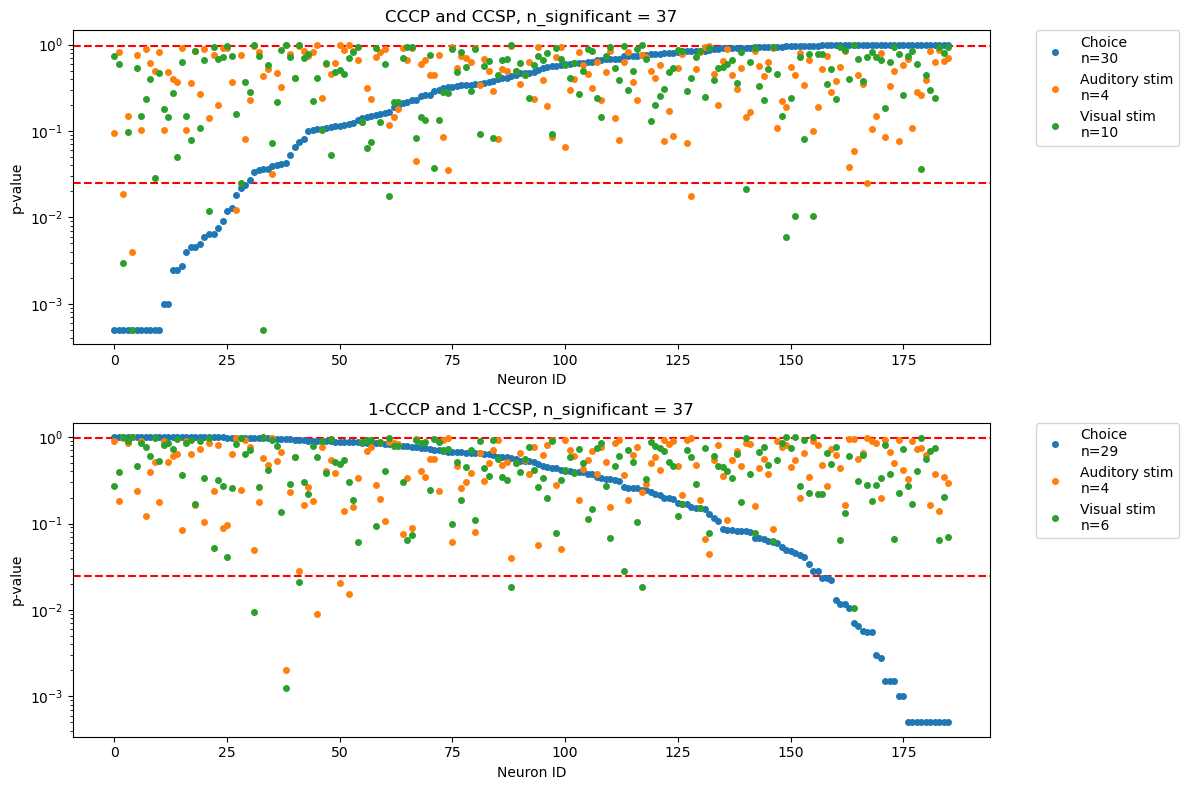

In [7]:
obj.calculate_cccp_ccsp()

#### Windows part

In [8]:
def calculate_n_freq_cccp_ccsp(obj, dict_results = {'n_big': [[],[],[]], 'n_small': [[],[],[]], 
                                                    'freq_big': [[],[],[]], 'freq_small': [[],[],[]],
                                                    'n_total': [], 'date': [], 'title': ['CCCP', 'CCSP_Aud', 'CCSP_Vis']}):
	obj.calculate_cccp_ccsp(plot=False)
 
	n_ccsp_aud_big = np.sum(obj.ccsp_aud_values > 0.975)
	n_ccsp_aud_small = np.sum(obj.ccsp_aud_values < 0.025)
	n_ccsp_vis_big = np.sum(obj.ccsp_vis_values > 0.975)
	n_ccsp_vis_small = np.sum(obj.ccsp_vis_values < 0.025)
	n_cccp_big = np.sum(obj.cccp_values > 0.975)
	n_cccp_small = np.sum(obj.cccp_values < 0.025)
 
	n_total = len(obj.cccp_values)
 
	freq_ccsp_aud_big = n_ccsp_aud_big / n_total
	freq_ccsp_aud_small = n_ccsp_aud_small / n_total
	freq_ccsp_vis_big = n_ccsp_vis_big / n_total
	freq_ccsp_vis_small = n_ccsp_vis_small / n_total
	freq_cccp_big = n_cccp_big / n_total
	freq_cccp_small = n_cccp_small / n_total
 
	dict_results['n_big'][0].append(n_cccp_big)
	dict_results['n_small'][0].append(n_cccp_small)
	dict_results['n_big'][1].append(n_ccsp_aud_big)
	dict_results['n_small'][1].append(n_ccsp_aud_small)
	dict_results['n_big'][2].append(n_ccsp_vis_big)
	dict_results['n_small'][2].append(n_ccsp_vis_small)
 
	dict_results['freq_big'][0].append(freq_cccp_big)
	dict_results['freq_small'][0].append(freq_cccp_small)
	dict_results['freq_big'][1].append(freq_ccsp_aud_big)
	dict_results['freq_small'][1].append(freq_ccsp_aud_small)
	dict_results['freq_big'][2].append(freq_ccsp_vis_big)
	dict_results['freq_small'][2].append(freq_ccsp_vis_small)
 
	dict_results['n_total'].append(n_total)
	dict_results['date'].append(session_date)
	return dict_results

In [9]:
dict_results = calculate_n_freq_cccp_ccsp(obj)

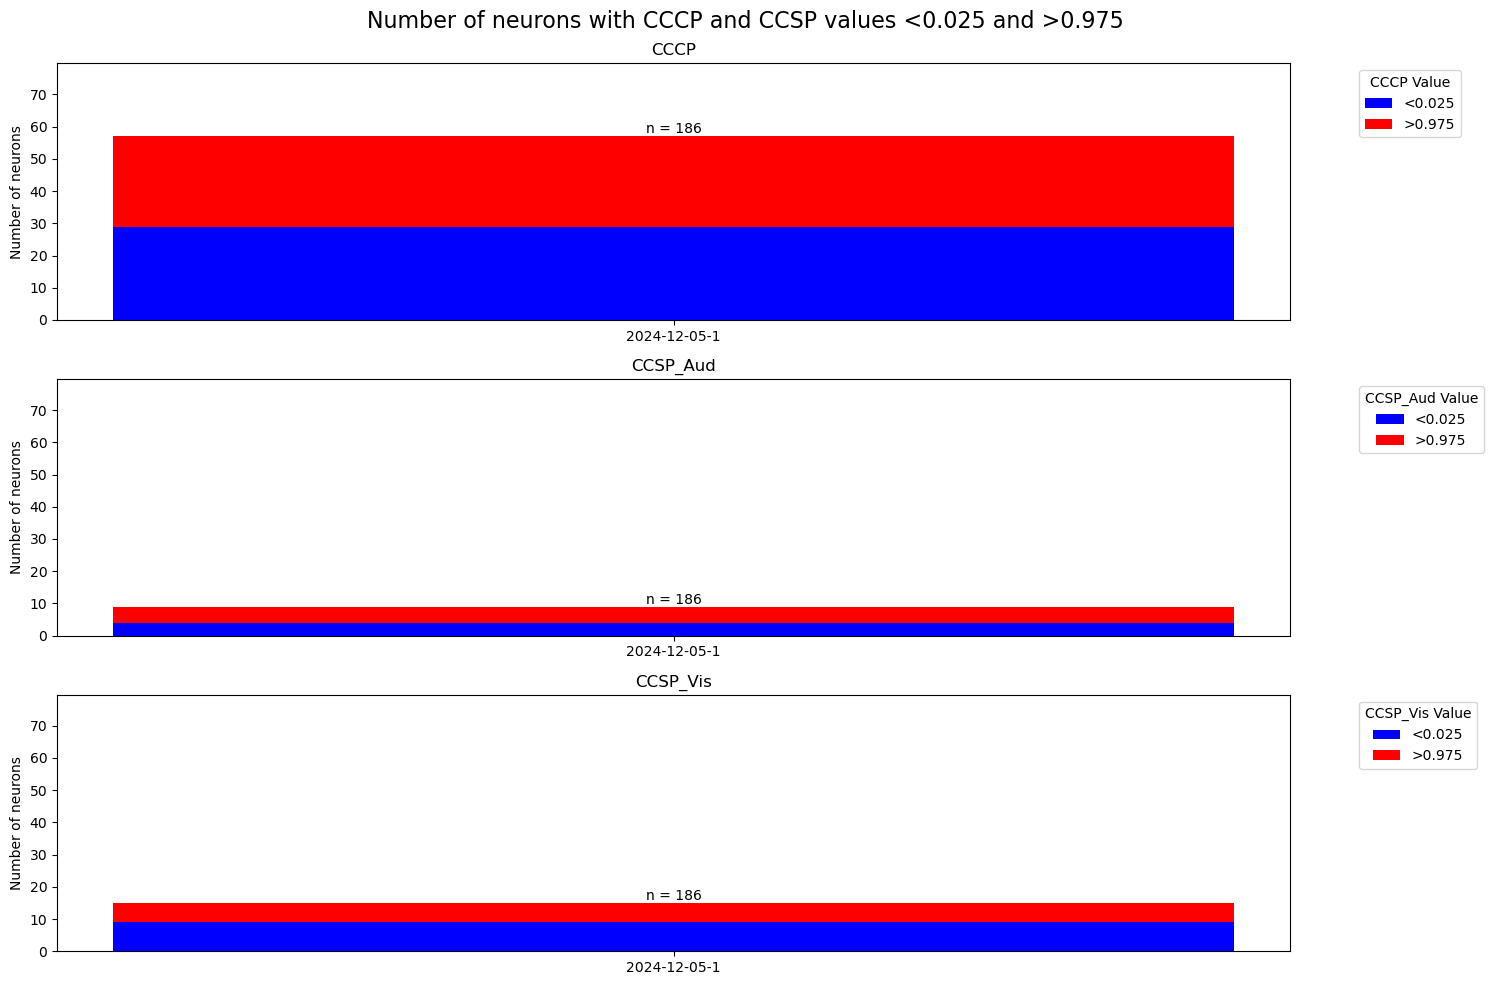

In [10]:
same_y_range = True
show_n = True
ylim = None

fig, axs = plt.subplots(3,1, figsize=(15, 10), sharey=same_y_range)
for i in range(3):
	ax = axs[i]
	ax.bar(dict_results['date'], dict_results['n_small'][i], color='blue', label='<0.025')
	ax.bar(dict_results['date'], dict_results['n_big'][i], color='red', label='>0.975', bottom=dict_results['n_small'][i])
	ax.set_title(dict_results['title'][i])
	ax.set_ylabel('Number of neurons')
	ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=f"{dict_results['title'][i]} Value")
	if show_n:
		for j, date in enumerate(dict_results['date']):  # Loop over each date
			total = dict_results['n_small'][i][j] + dict_results['n_big'][i][j]  # Sum per date
			ax.text(date, total, f"n = {dict_results['n_total'][j]}", 
					ha='center', va='bottom', fontsize=10)
		if ylim is not None:
			ax.set_ylim(ylim)  # Increase ylim properly
		else:
			ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

plt.suptitle('Number of neurons with CCCP and CCSP values <0.025 and >0.975', fontsize=16)   
plt.tight_layout()
plt.show()

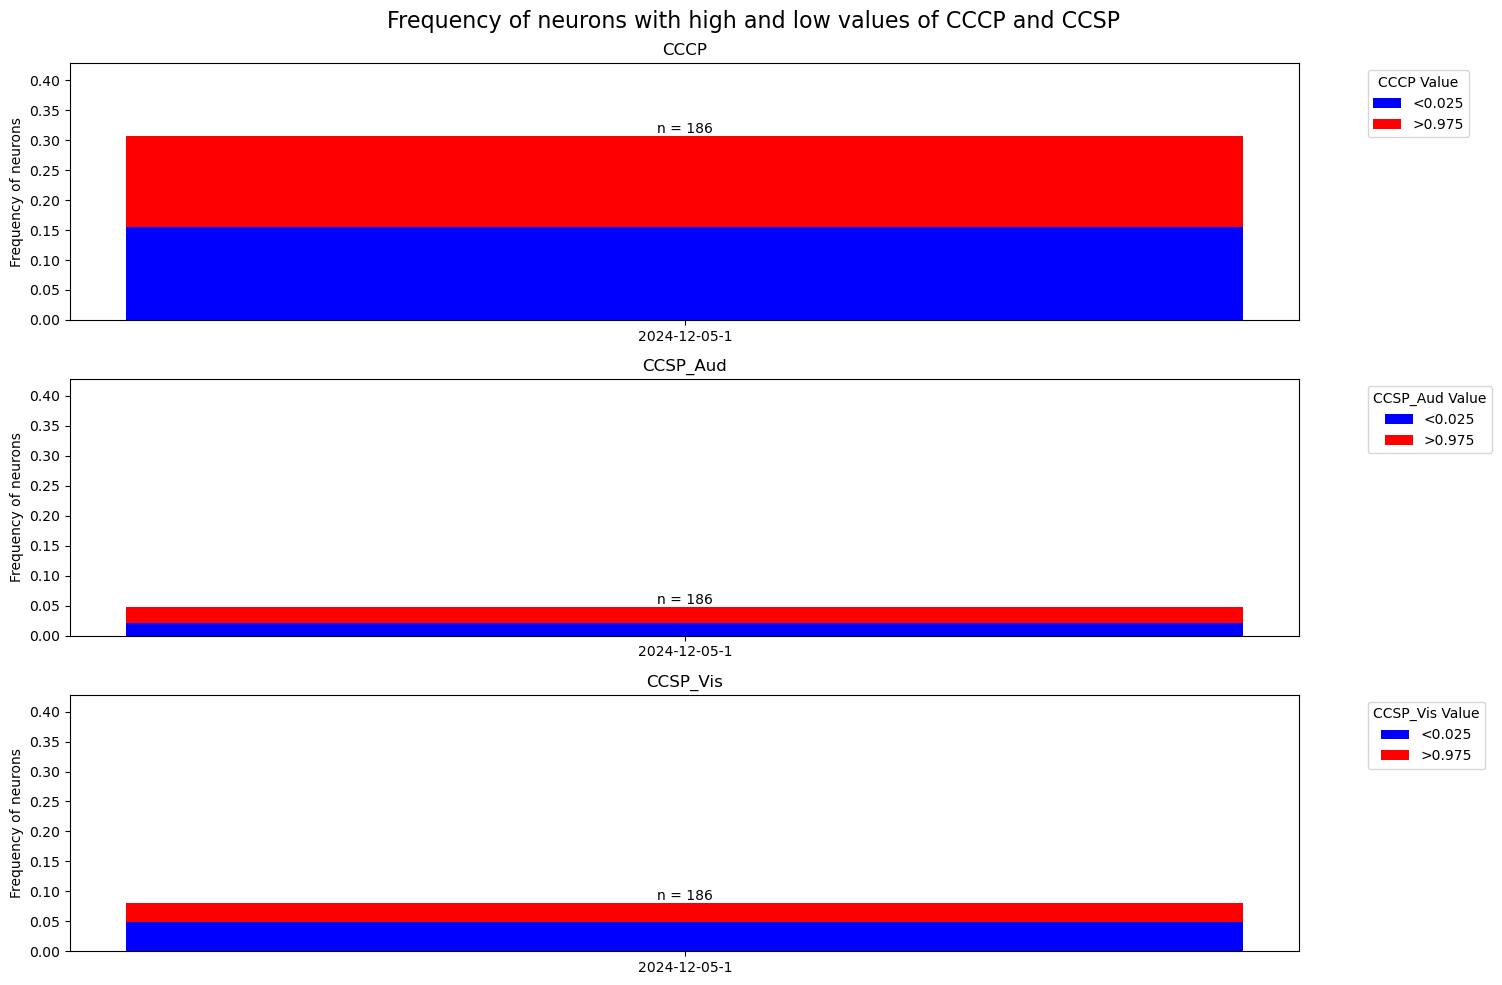

In [11]:
same_y_range = True
show_n = True
ylim = None

fig, axs = plt.subplots(3,1, figsize=(15, 10), sharey=same_y_range)
for i in range(3):
	ax = axs[i]
	ax.bar(dict_results['date'], dict_results['freq_small'][i], color='blue', label='<0.025')
	ax.bar(dict_results['date'], dict_results['freq_big'][i], color='red', label='>0.975', bottom=dict_results['freq_small'][i])
	ax.set_title(dict_results['title'][i])
	ax.set_ylabel('Frequency of neurons')
	ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=f"{dict_results['title'][i]} Value")
	if show_n:
		for j, date in enumerate(dict_results['date']):  # Loop over each date
			total = dict_results['freq_small'][i][j] + dict_results['freq_big'][i][j]  # Sum per date
			ax.text(date, total, f"n = {dict_results['n_total'][j]}", 
					ha='center', va='bottom', fontsize=10)
		if ylim is not None:
			ax.set_ylim(0, ylim)
		else:
			ax.set_ylim(0, ax.get_ylim()[1] * 1.1)  # Increase ylim properly

plt.suptitle('Frequency of neurons with high and low values of CCCP and CCSP', fontsize=16)
plt.tight_layout()
plt.show()

# Initial Visualisation

## Heatmap

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes_v2.py:949: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


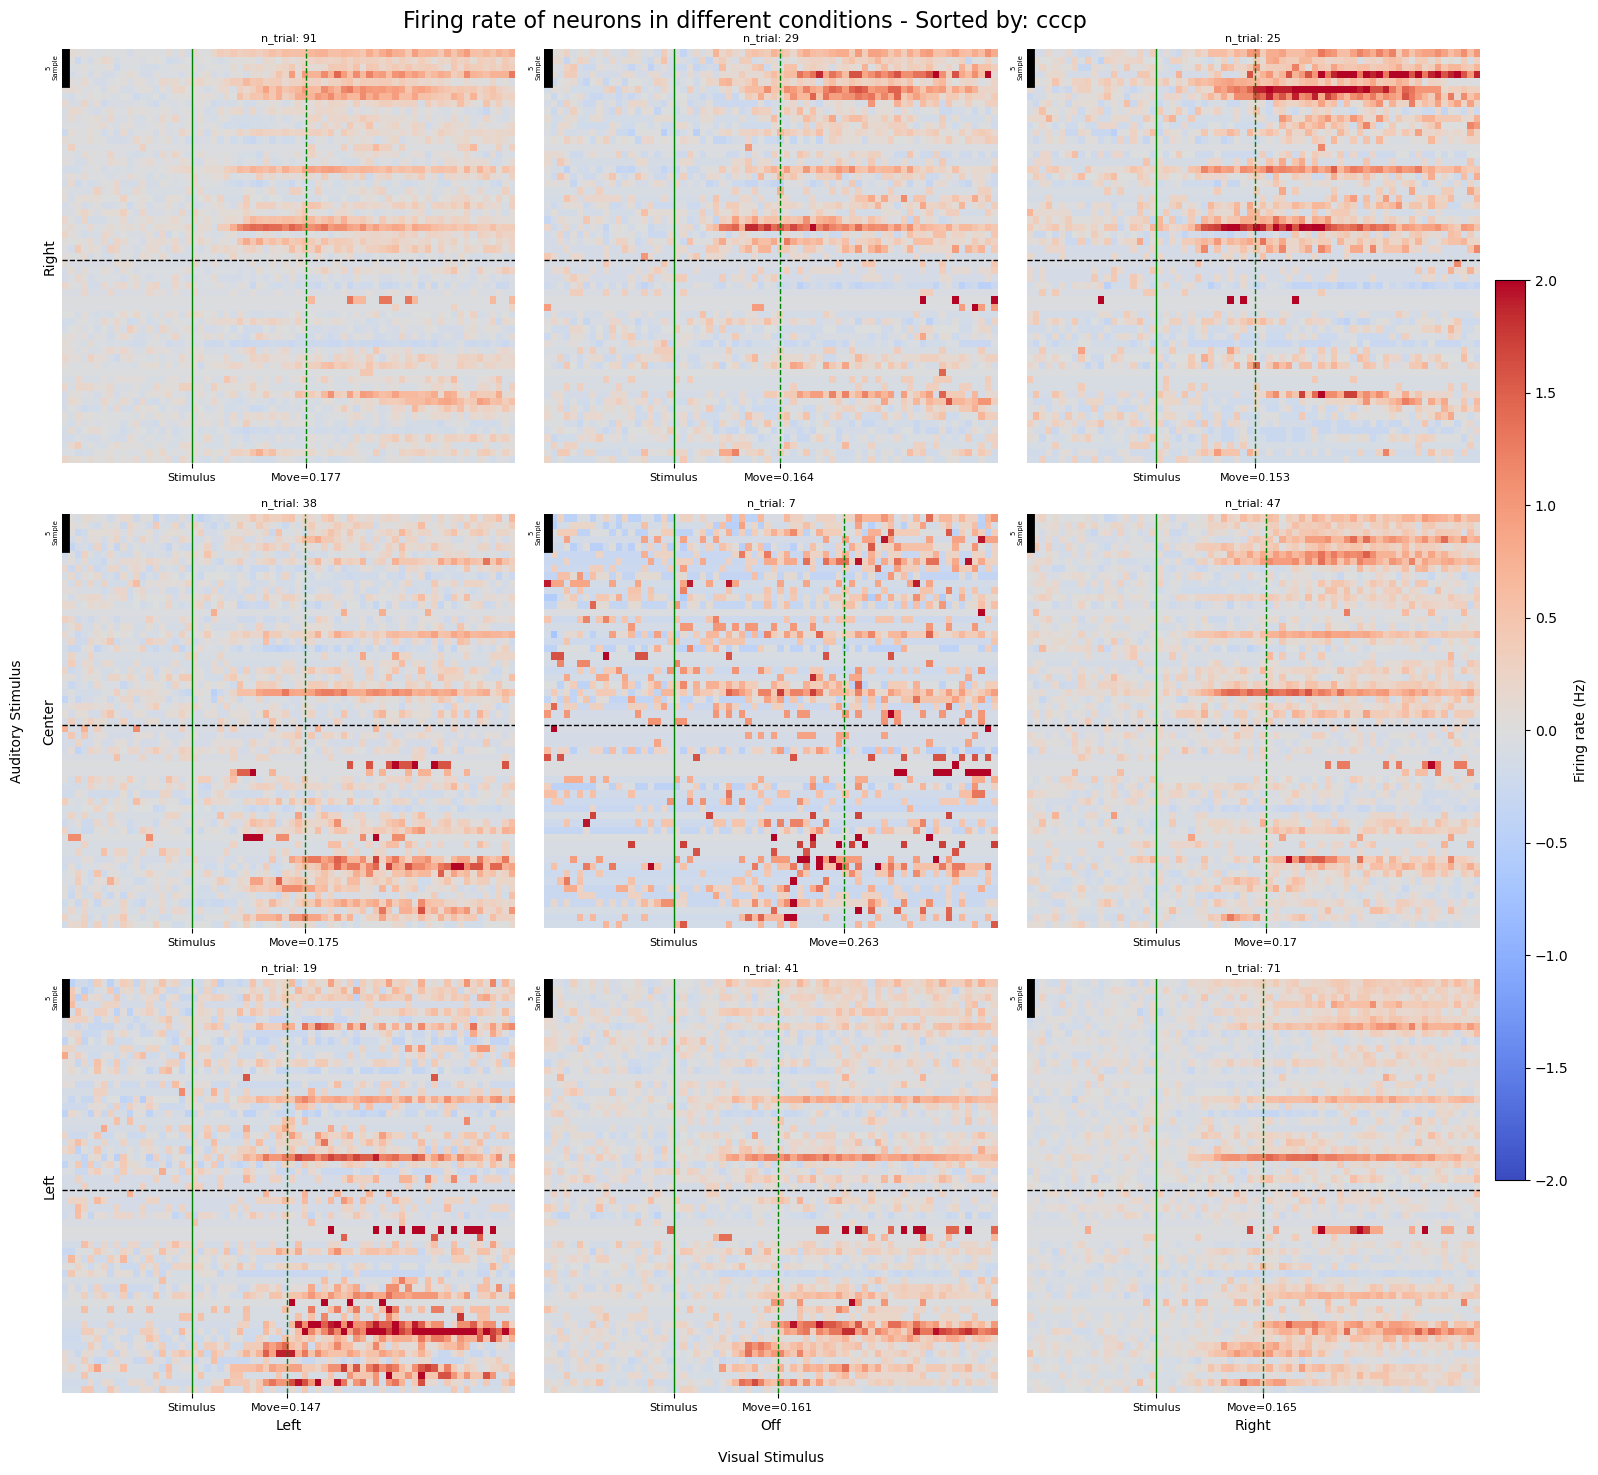

In [12]:
obj.plot_heatmap_trials(cmap='coolwarm', center = 0, vmax=2, vmin=-2, sort_based_on='cccp', hline_col = 'k', figsize=(15,15),
                        only_significant=True)

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes_v2.py:1055: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


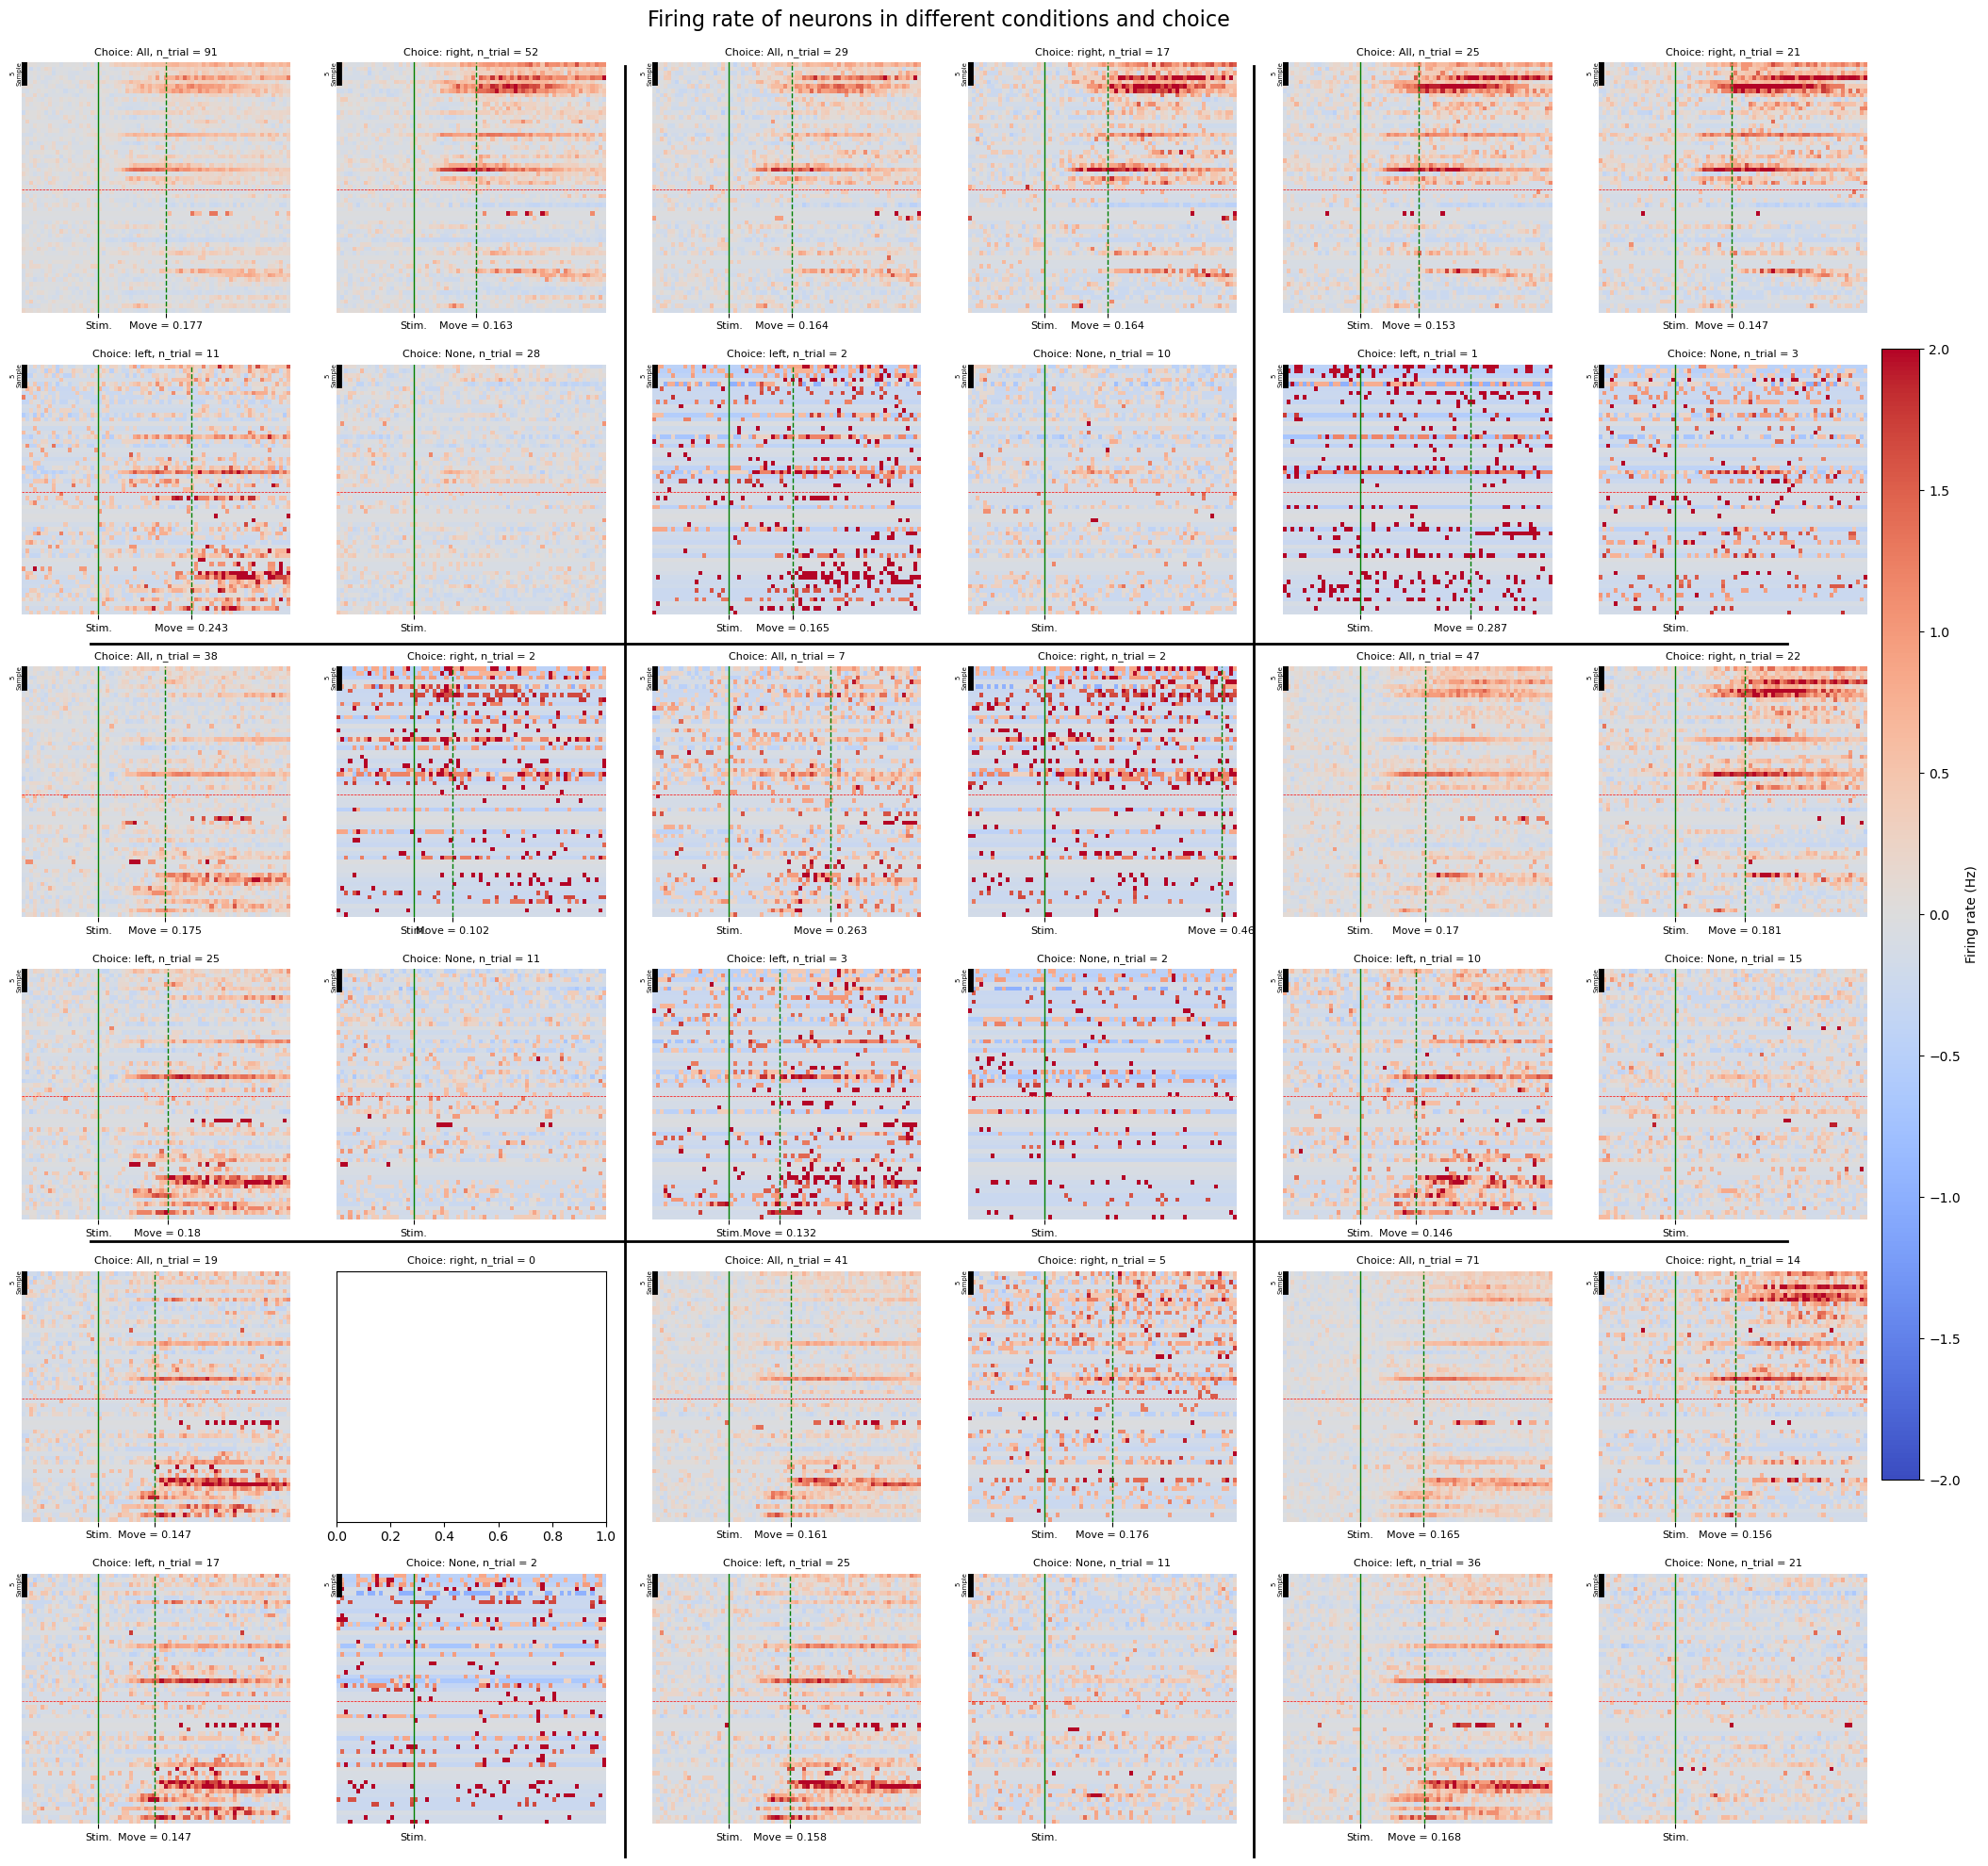

In [13]:
obj.plot_heatmap_trials_choice(cmap = 'coolwarm', center = 0, vmax=2, vmin=-2, sort_based_on='cccp',
                               only_significant=True)

## PSTH

In [14]:
obj.select_data_interest() # visual_trial = True

### Single

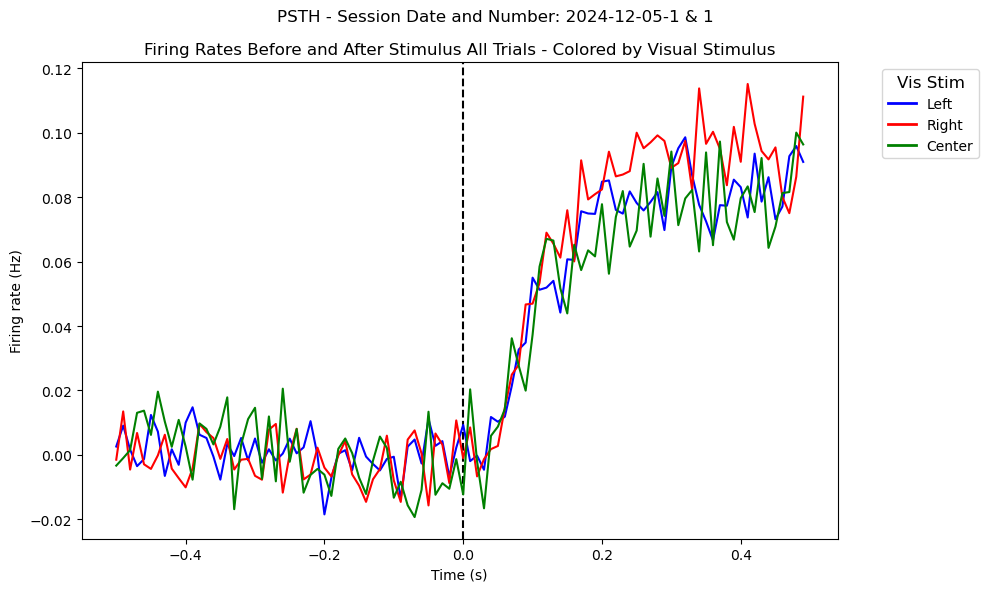

In [15]:
obj.plot_PSTH(color_based_on='visual', only_average=True)

### Grid

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes_v2.py:328: RuntimeWarning: Mean of empty slice.
  ax.plot(self.times, self.interest_data['firing_rate'][:, r_index].mean(axis=1).mean(axis=0), c = 'red',label = 'Right', alpha = 1)
/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


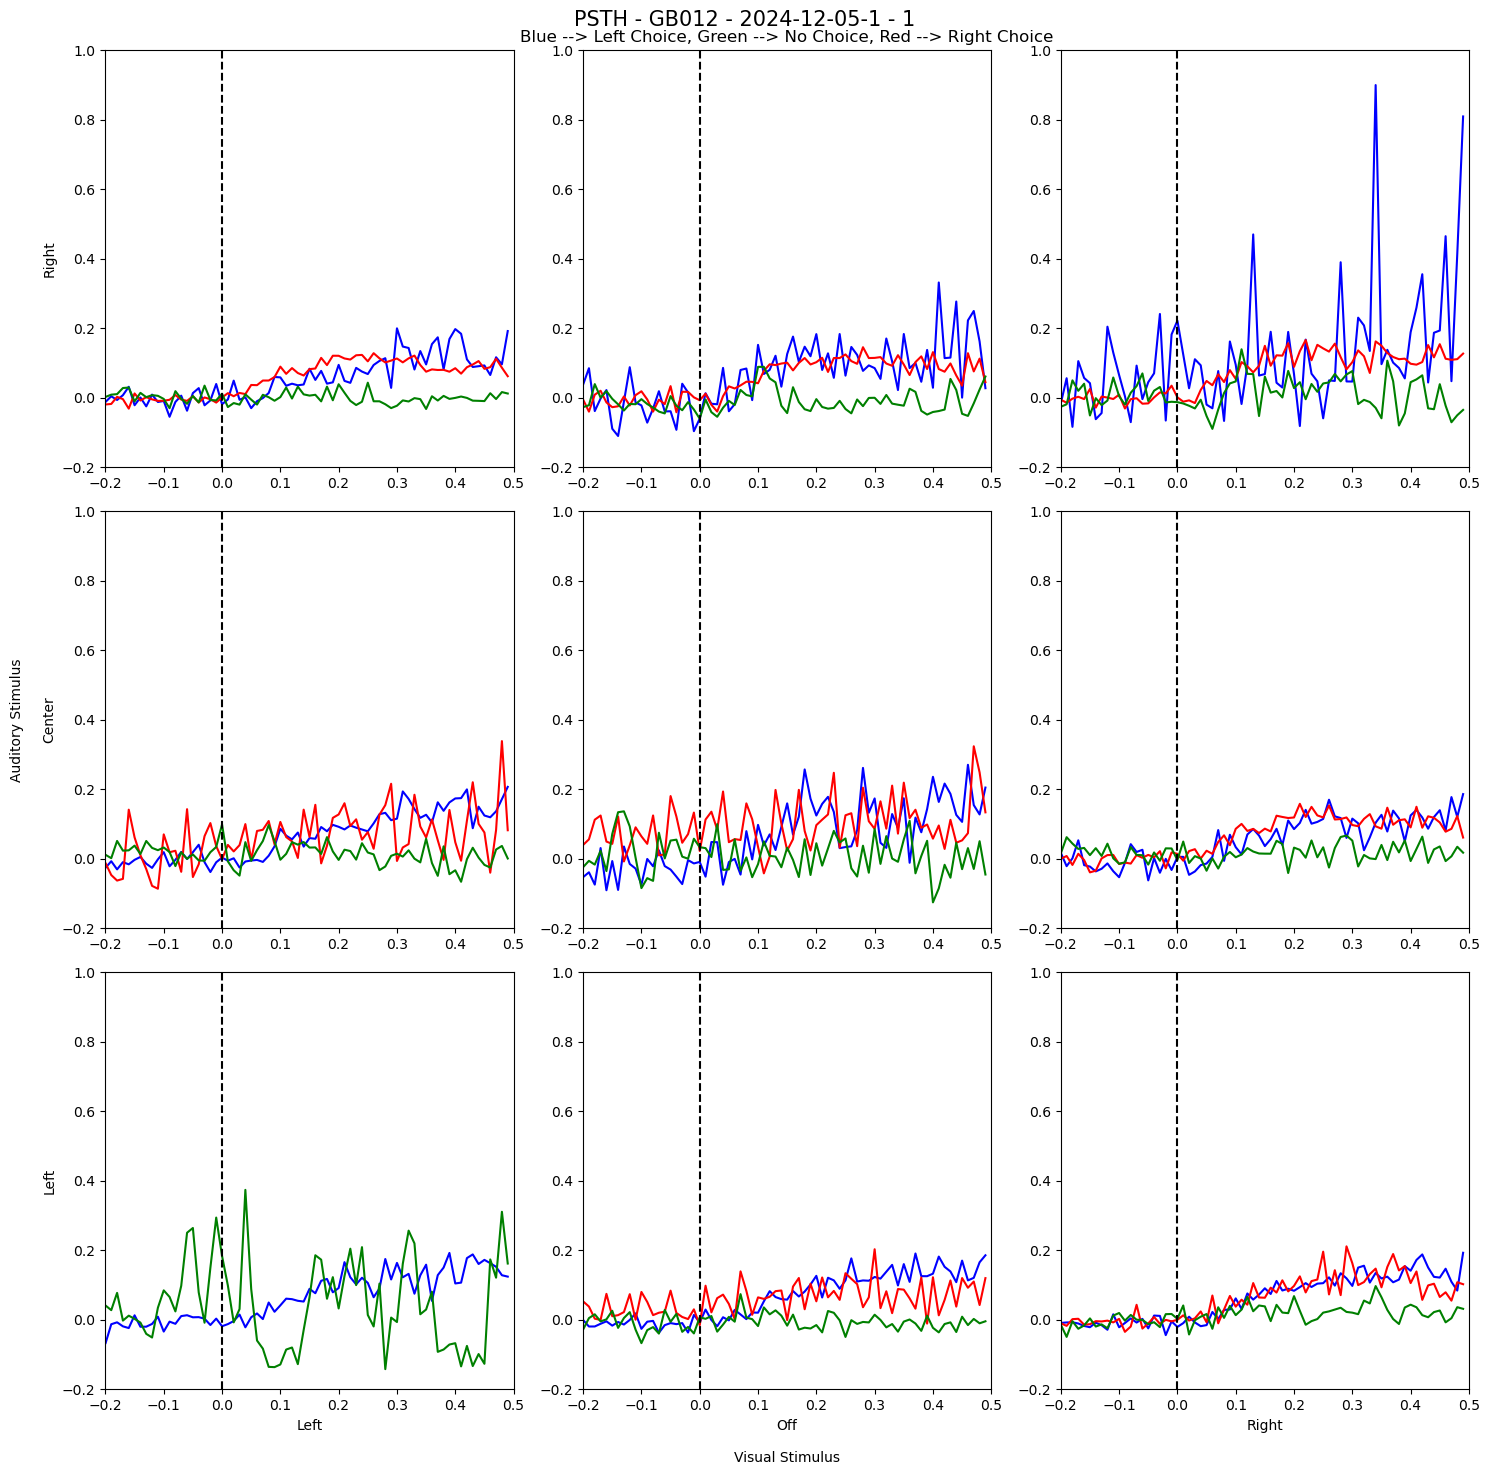

In [16]:
obj.plot_PSTH_grid(ylim = (-0.2,1), only_average=True)

## Raster plot

In [17]:
obj.select_data_interest()

### Grid

In [18]:
np.where(obj.ccsp_vis_values < 0.025)

(array([ 10,  24,  43, 115, 125, 133, 137, 165, 184]),)

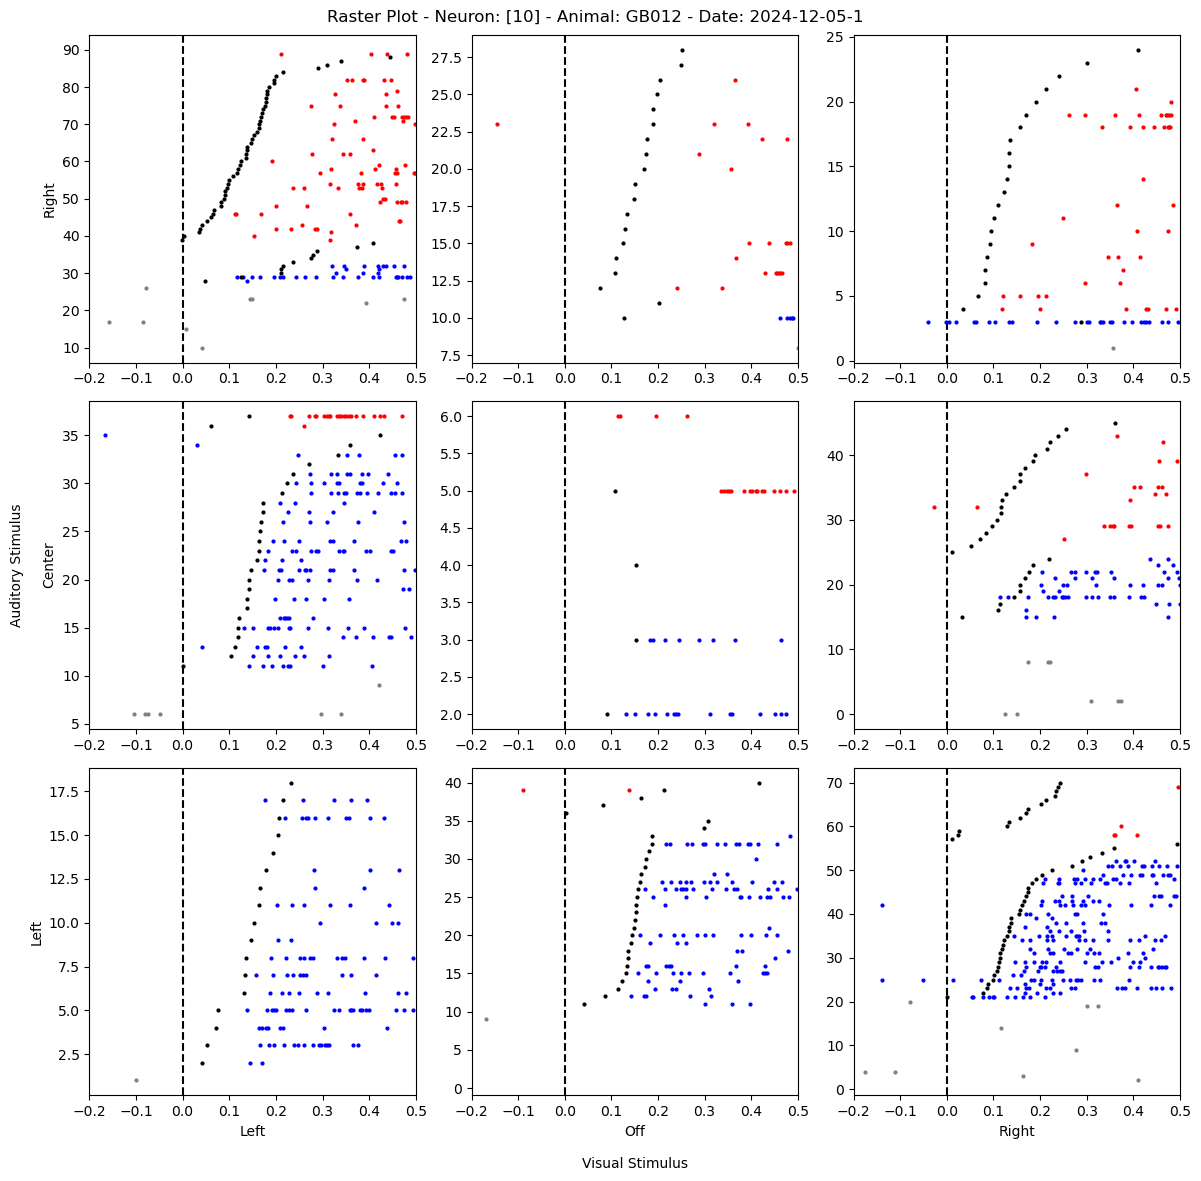

In [19]:
obj.plot_raster_grid(neuron_ids = [10], first_move = True, sort_choice_loc=True, sort_response_time=True, xlim=(-0.2, 0.5), figsize=(12, 12))

## Dimension Reduction

In [20]:
obj.select_data_interest()
obj.significant_neurons()

/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:563: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


### PCA

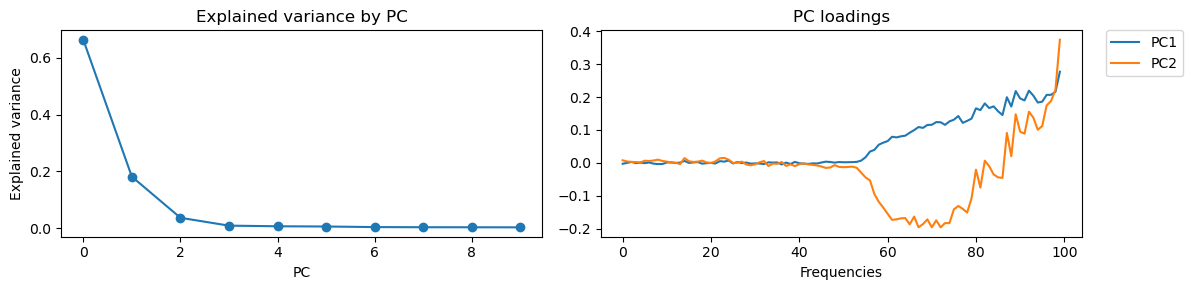

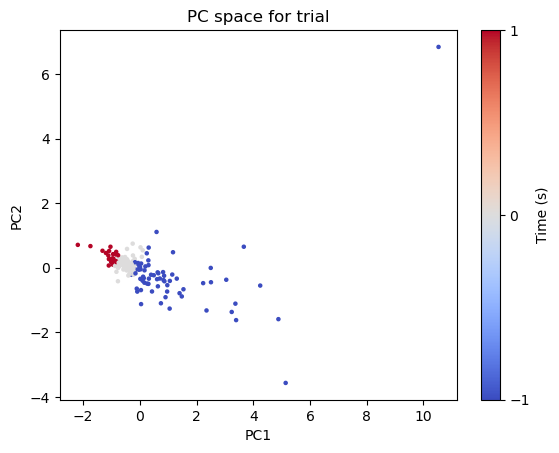

In [21]:
obj.select_data_interest()
pc_x = 0;pc_y=1
obj.apply_dim_red_to_mean_fr(pc_x = pc_x, pc_y = pc_y, reduce_freq = True, pca= True, umap = True, line = False)

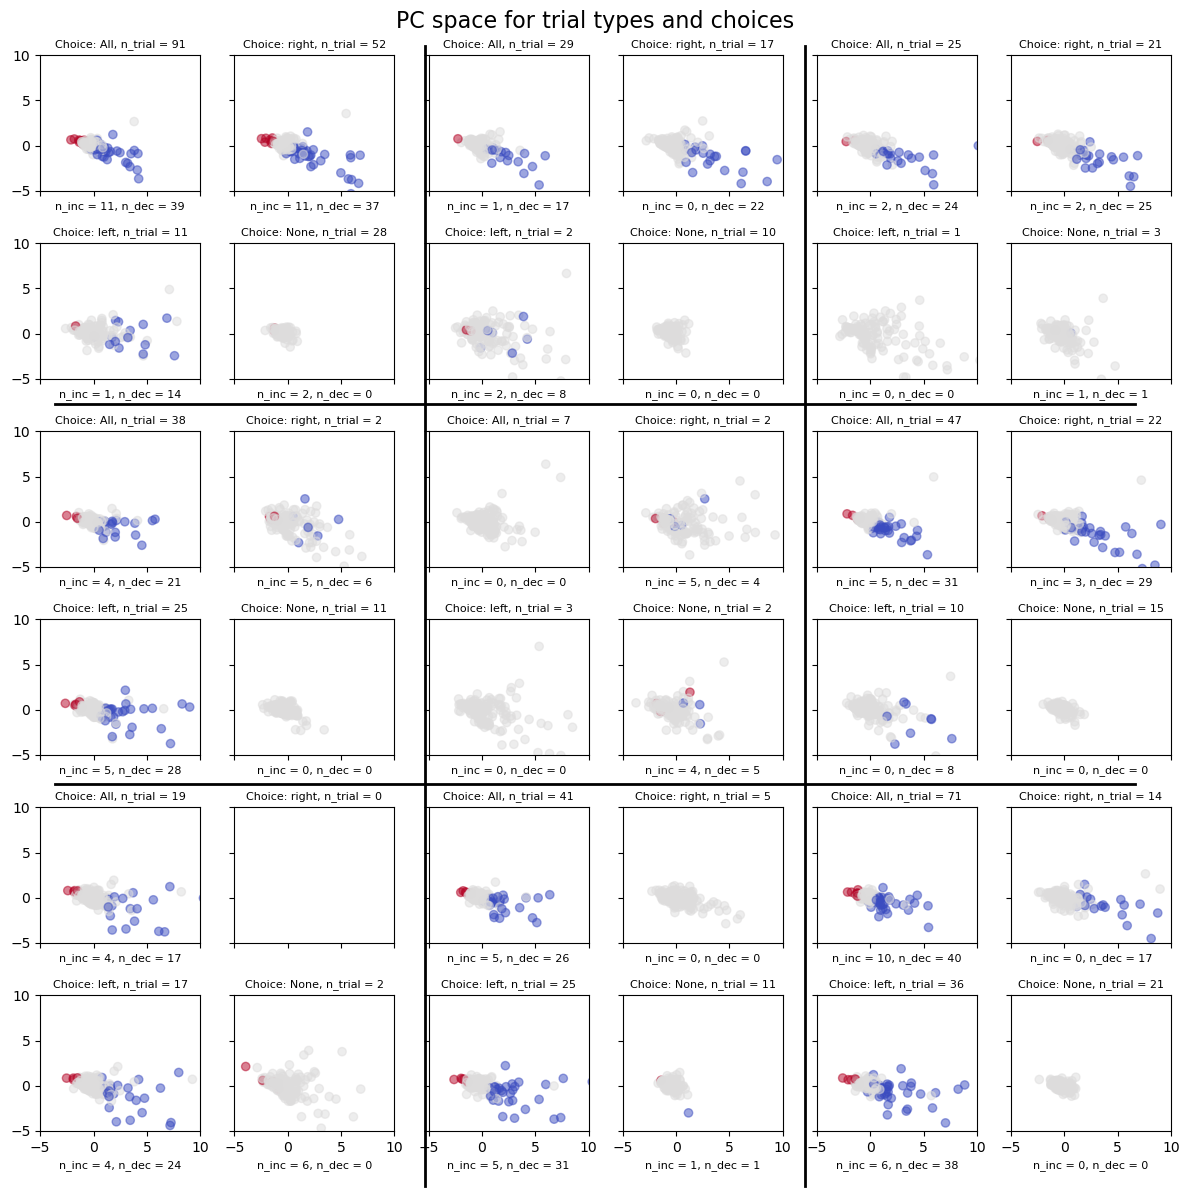

In [22]:
pc_x = 0
pc_y = 1
obj.apply_dim_red_to_mean_fr_reduce_fr_grid(pc_x = pc_x, pc_y = pc_y, pca = True, umap = True, xlim = (-5, 10), ylim = (-5, 10))

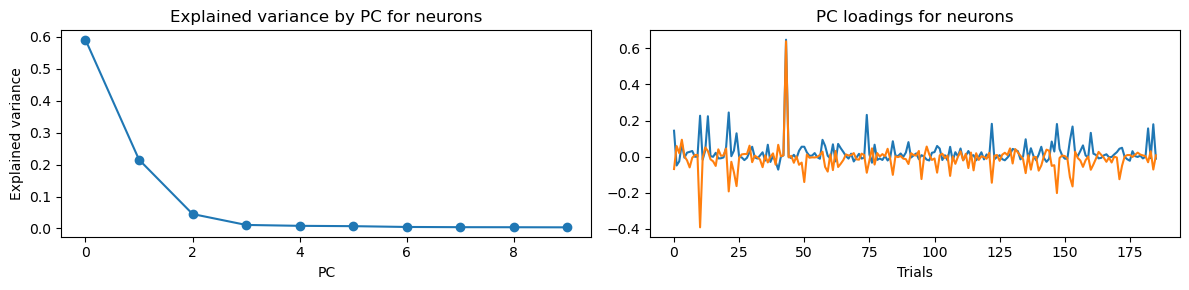

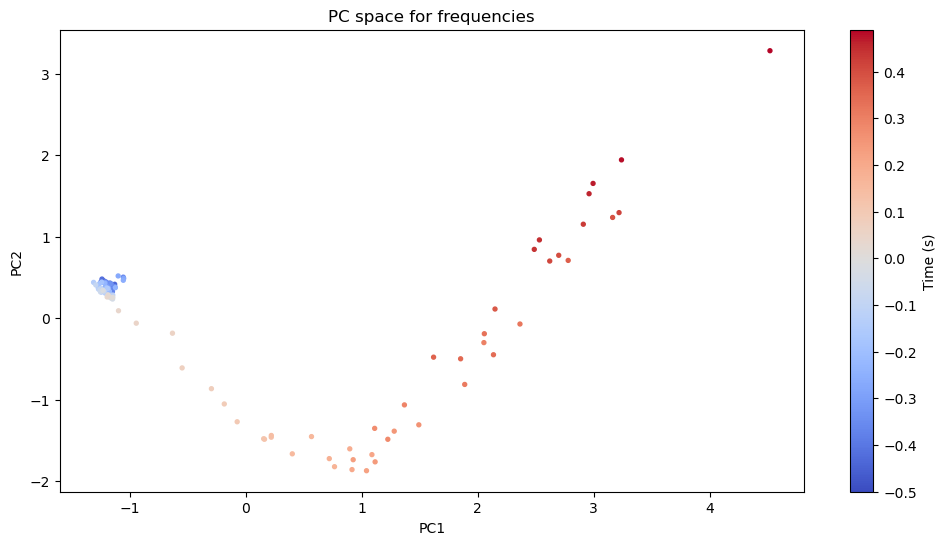

In [23]:
obj.select_data_interest()
pc_x = 0;pc_y=1
obj.apply_dim_red_to_mean_fr(pc_x = pc_x, pc_y = pc_y, reduce_freq = False, pca= True, umap = True, line = False)

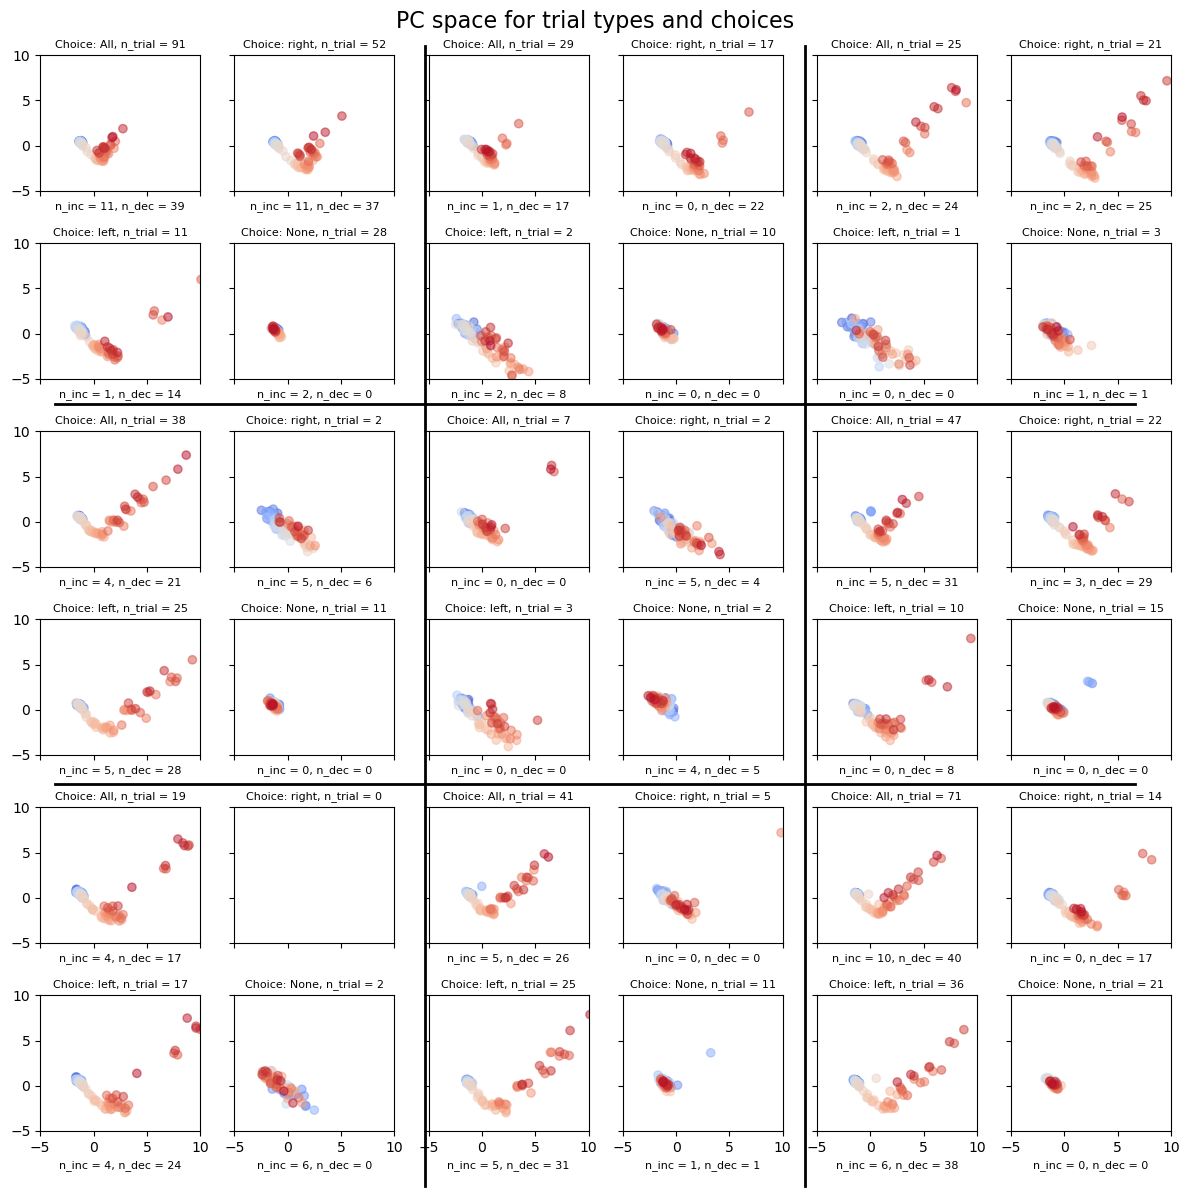

In [24]:
obj.apply_dim_red_to_mean_fr_reduce_neuron_grid(pc_x = pc_x, pc_y = pc_y, pca = True, umap = True, xlim = (-5, 10), ylim = (-5, 10))

In [25]:
### concatenate the trial types instead of averaging all trials

In [26]:
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

In [27]:
concat_data = np.empty((obj.interest_data['firing_rate'].shape[0], len(obj.conditions)*obj.interest_data['firing_rate'].shape[2]))
for i in range(len(obj.conditions)):
    obj.select_data_interest(**obj.conditions[i])
    concat_data[:,i*obj.interest_data['firing_rate'].shape[2]:(i+1)*obj.interest_data['firing_rate'].shape[2]] = obj.interest_data['firing_rate'].mean(axis=1)

In [28]:
dim_red_obj = PCA(n_components=10)
projected_data = dim_red_obj.fit_transform(concat_data.T) # neurons x PC

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/l1/l742y54d4hx05wj38054vs_r0000gn/T/ipykernel_86306/4017188261.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


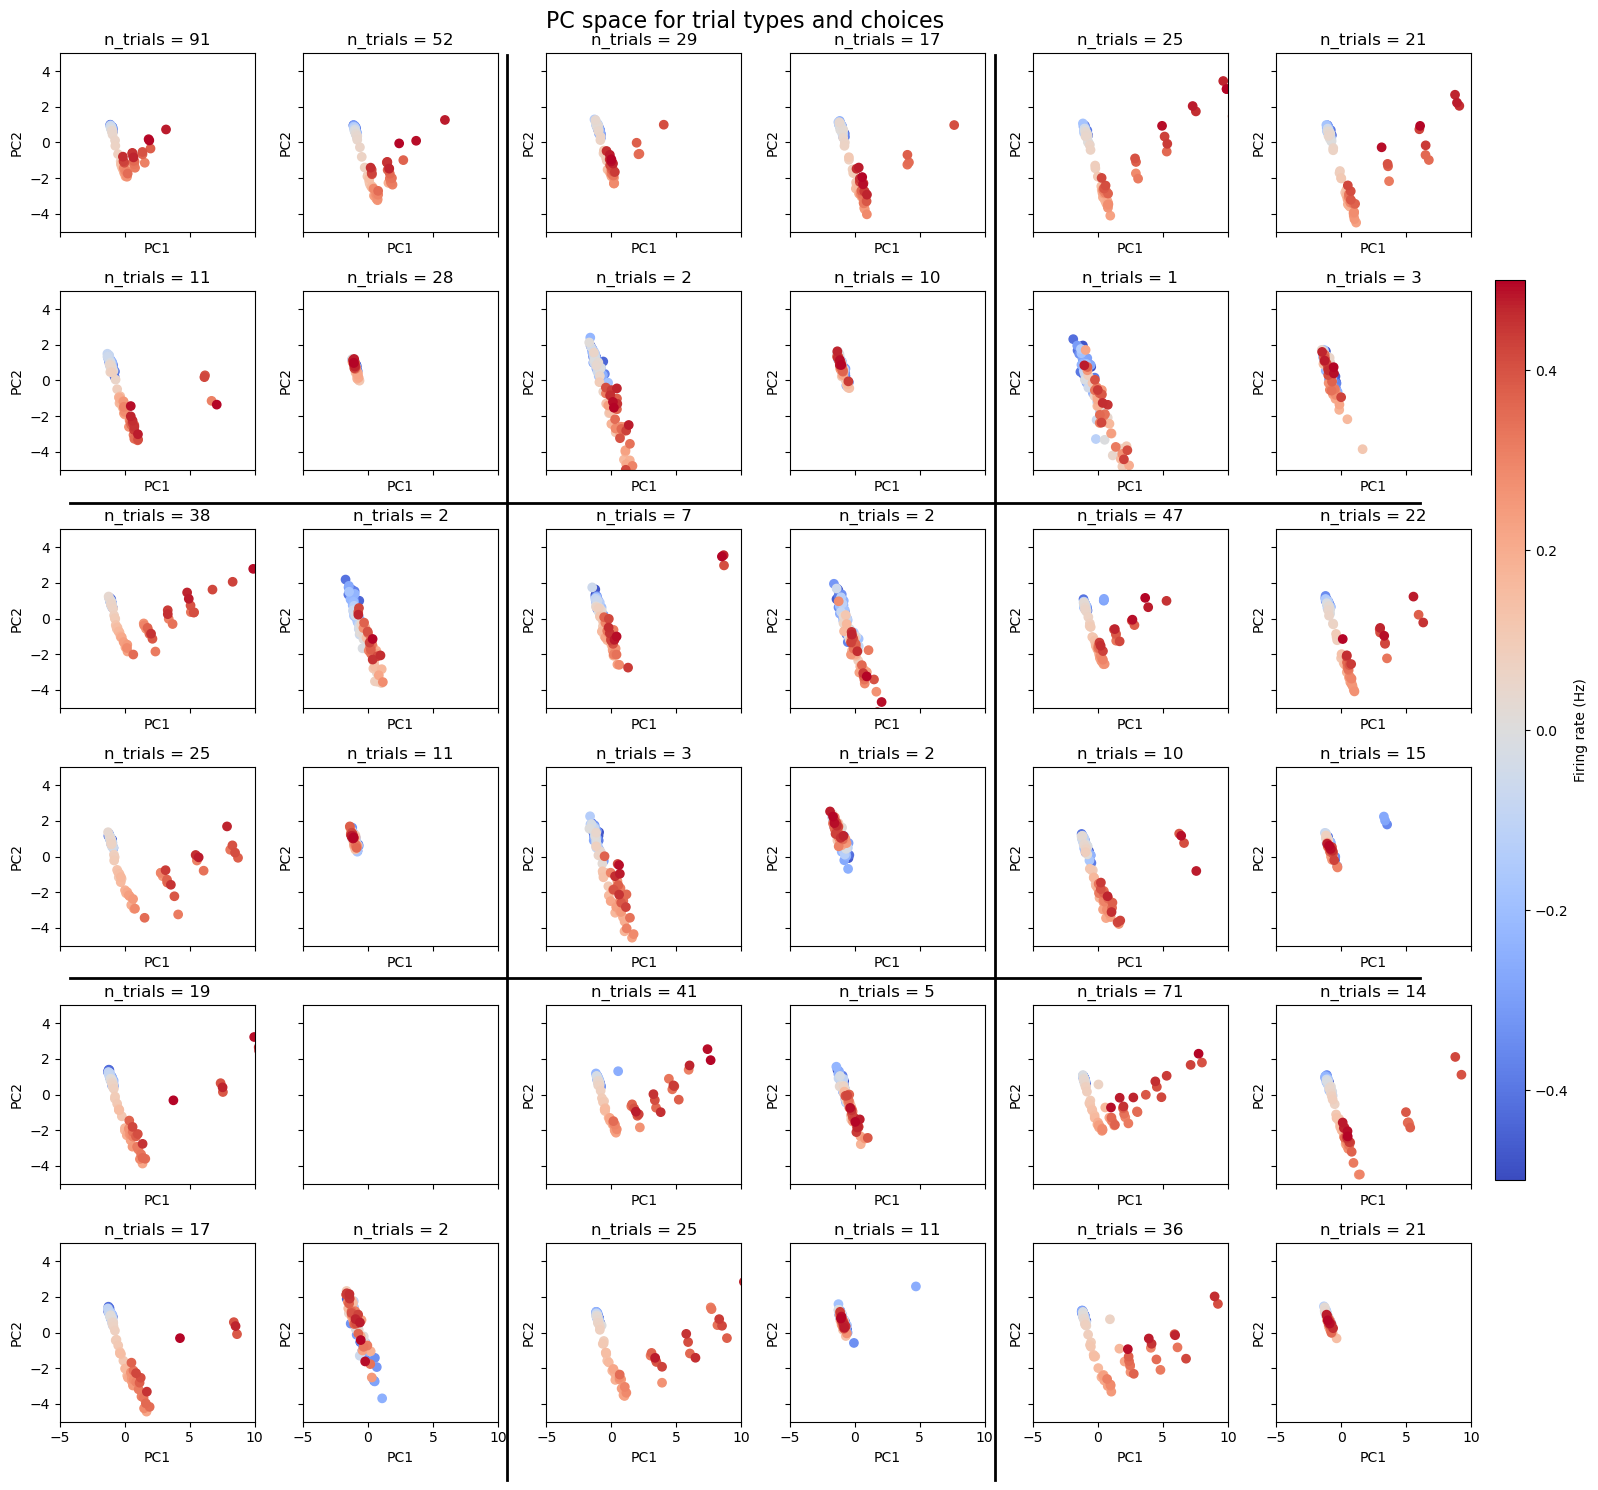

In [29]:
pc_x = 0
pc_y = 1
xlim = (-5, 10)
ylim = (-5, 5)
fig, axs = plt.subplots(6,6, figsize = (15,15), sharex = True, sharey = True)
custom_order = []
for row_group in range(0, 6, 2):  # Iterate over row pairs (0-1, 2-3, 4-5)
	for col in range(6):          # Iterate over columns
		custom_order.append((row_group, col))
		custom_order.append((row_group + 1, col))
choice = [None, 'left', 'right', 'n']
for index, (r, c) in enumerate(custom_order):
	ax = axs[r, c]
	ax.set_xlim(xlim)
	ax.set_ylim(ylim)
	trial = index//4
	choice_no = index%4
	mask = obj.conditions[trial]
	mask_choice= mask.copy()
	mask_choice['choice'] = choice[choice_no] 
	obj.select_data_interest(**mask_choice)
	n_trials = obj.interest_data['firing_rate'].shape[1]
	if n_trials == 0:
		continue

	current_data = obj.interest_data['firing_rate'].mean(axis=1)
	current_data_projected = dim_red_obj.transform(current_data.T)
	ax.scatter(current_data_projected[:,pc_x], current_data_projected[:,pc_y], c = obj.times, cmap = 'coolwarm')
	ax.set_title(f'n_trials = {n_trials}')
	ax.set_xlabel(f'PC{pc_x+1}')
	ax.set_ylabel(f'PC{pc_y+1}')
 
# Add separation lines
line_color = "black"
line_width = 2

# Add vertical lines between columns 2 & 4
for x_pos in [2.05, 4.0]:
	fig.add_artist(Line2D([x_pos/6, x_pos/6], [0, 0.95], transform=fig.transFigure, color=line_color, linewidth=line_width))

# Add horizontal lines between rows 1 & 3
for y_pos in [2/6, 3.9/6]:
	fig.add_artist(Line2D([0.05, 0.95], [0.985 - y_pos, 0.985 - y_pos], transform=fig.transFigure, color=line_color, linewidth=line_width))

cbar_ax = fig.add_axes([1, 0.2, 0.02, 0.6])  # [left, bottom, width, height] (adjustable)
sm = plt.cm.ScalarMappable(cmap = 'coolwarm', norm = plt.Normalize(vmin=-0.5, vmax=0.5))
fig.colorbar(sm, cax = cbar_ax, label='Firing rate (Hz)')

plt.suptitle('PC space for trial types and choices', fontsize=16)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'PCA explained variance')

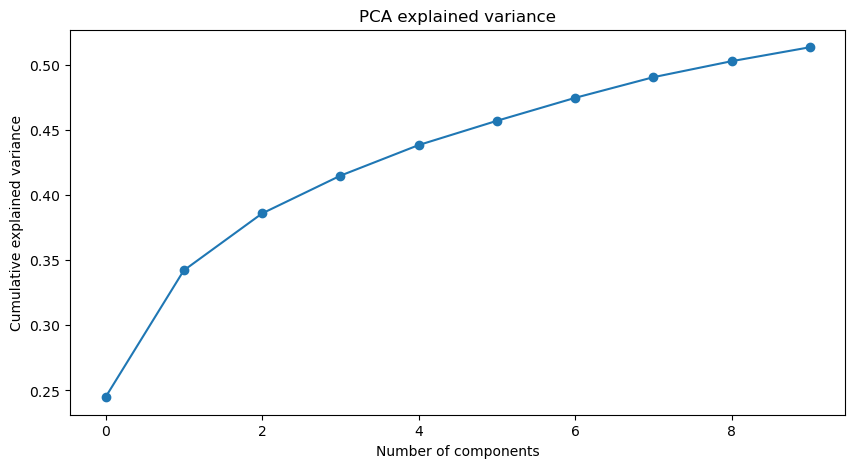

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(dim_red_obj.explained_variance_ratio_.cumsum(), 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA explained variance')


Text(0.5, 1.0, 'PCA components')

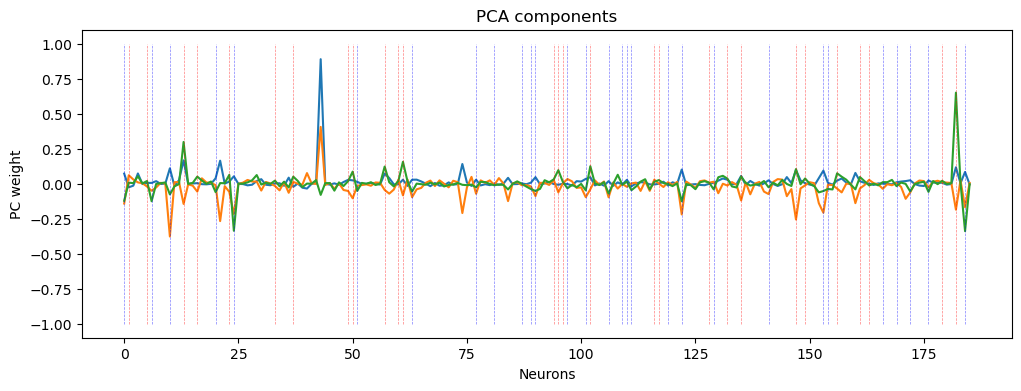

In [31]:
plt.figure(figsize=(12,4))
plt.plot(dim_red_obj.components_[0])
plt.plot(dim_red_obj.components_[1])
plt.plot(dim_red_obj.components_[2])
# plt.plot(np.arange(obj.cccp_values.shape[0])[obj.cccp_values>0.975], -0.05+np.ones(np.sum(obj.cccp_values>0.975)), 'o', ms = 5)
# plt.plot(np.arange(obj.cccp_values.shape[0])[obj.cccp_values<0.025], np.ones(np.sum(obj.cccp_values<0.025)), 'o', ms = 5)
plt.vlines(np.arange(obj.cccp_values.shape[0])[obj.cccp_values>0.975], ymin=-1,ymax=1, lw=0.5, color='r', alpha = 0.5, ls = '--')
plt.vlines(np.arange(obj.cccp_values.shape[0])[obj.cccp_values<0.025], ymin=-1,ymax=1, lw=0.5, color='b', alpha = 0.5, ls = '--')

plt.xlabel('Neurons')
plt.ylabel('PC weight')
plt.title('PCA components')